In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [15]:
print(data.head())
print(data.describe())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


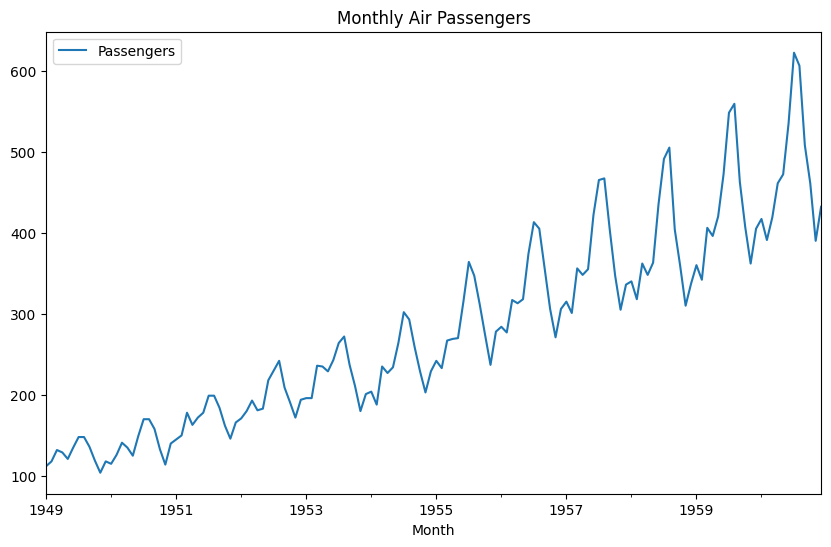

In [5]:
data.plot(figsize=(10, 6), title="Monthly Air Passengers")
plt.show()

In [7]:
print(data.isnull().sum())

Passengers    0
dtype: int64


In [8]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [10]:
model = ARIMA(train['Passengers'], order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Tue, 18 Feb 2025   AIC                           1061.098
Time:                        13:12:27   BIC                           1077.515
Sample:                    01-01-1949   HQIC                          1067.760
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

In [12]:
predictions = model_fit.forecast(steps=len(test))

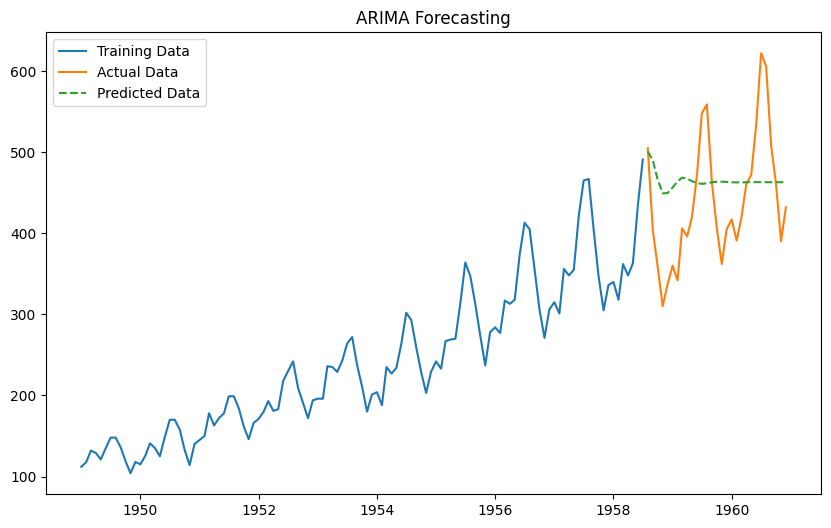

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual Data')
plt.plot(test.index, predictions, label='Predicted Data', linestyle='--')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 80.66394528577948
